This is a Sunny port of SpinW tutorial 7, originally authored by Bjorn Fak and Sandor Toth. The goal is to calculate the spin wave spectrum of k=0 Kagome antiferromagnet.

Load Packages

In [1]:
using Sunny, GLMakie, CairoMakie  

Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions and the spin. Space group is P-3 or 147. 

In [2]:
a=6.0
b=6.0
c=10.0

units=Units(:meV)
latvecs = lattice_vectors(a, b, c, 90, 90, 120)
positions=[[1/2, 0, 0]]
types=["Cr1"]
Cr = Crystal(latvecs,positions,147;types)
GLMakie.activate!()
view_crystal(Cr)

Set up the system. The supercell is (1,1,1) and the spin is 1.

In [3]:
sys=System(Cr, (1,1,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

System [Dipole mode]
Lattice (1×1×1)×3
Energy per site 0


Set up the exchanges and the Hamiltonian. Randomize the spins and then minimize the energy. 

In [4]:
J1=1.0
J2=0.11

set_exchange!(sys,J1,Bond(2, 3, [0, 0, 0]))
set_exchange!(sys,J2,Bond(2, 1, [0, 0, 0]))
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)

Create the LSWT object and set up a path. Obtain the dispersion and intensity bands.

In [6]:
swt=SpinWaveTheory(sys;measure=ssf_perp(sys))
q_points = [[-1/2,0,0], [0,0,0], [1/2,1/2,0]]
density = 400
path = q_space_path(Cr, q_points, density);
res = intensities_bands(swt, path)

Sunny.BandIntensities{Float64} (3×400 elements)

Plot the dispersion and intensity bands.

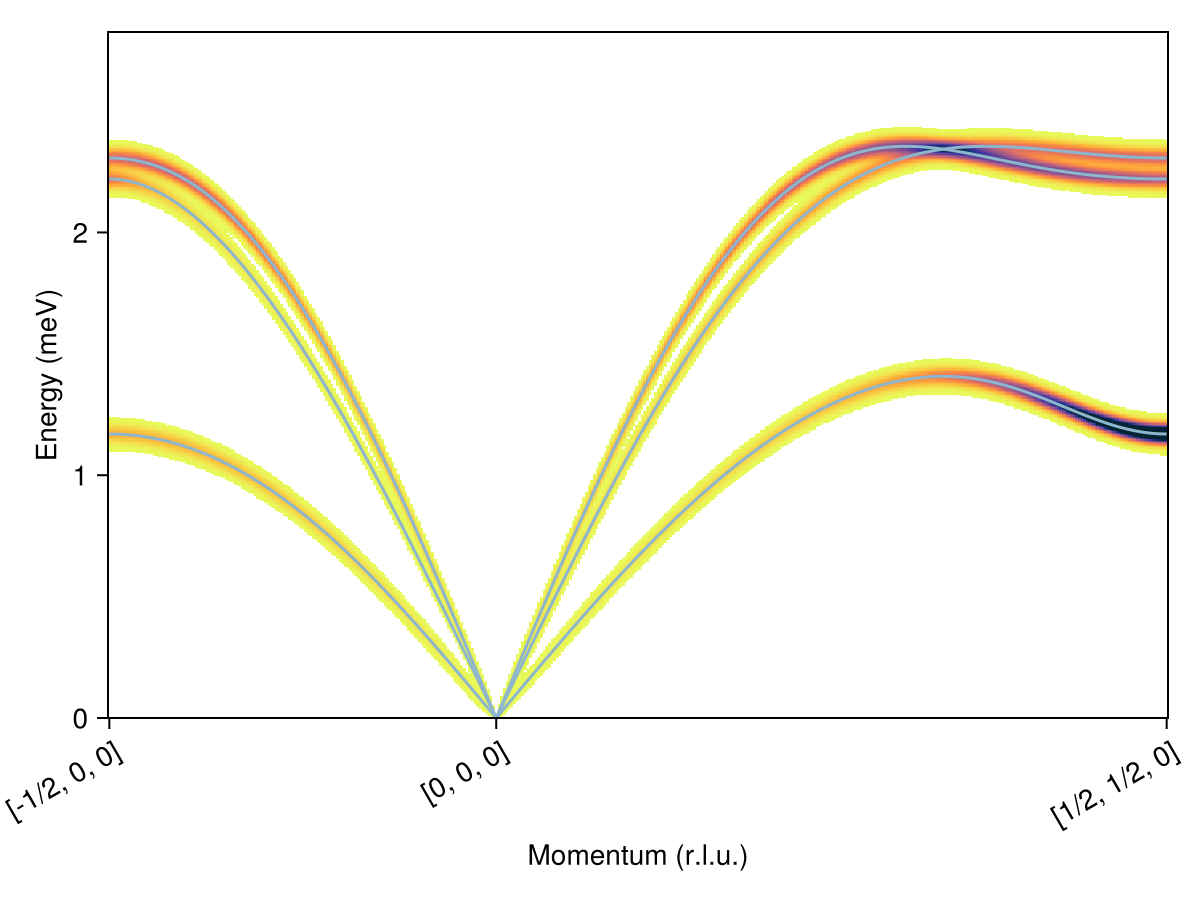

In [7]:
CairoMakie.activate!()
Sunny.BandIntensities{Float64}
plot_intensities(res; units)

Plot the powder averaged results

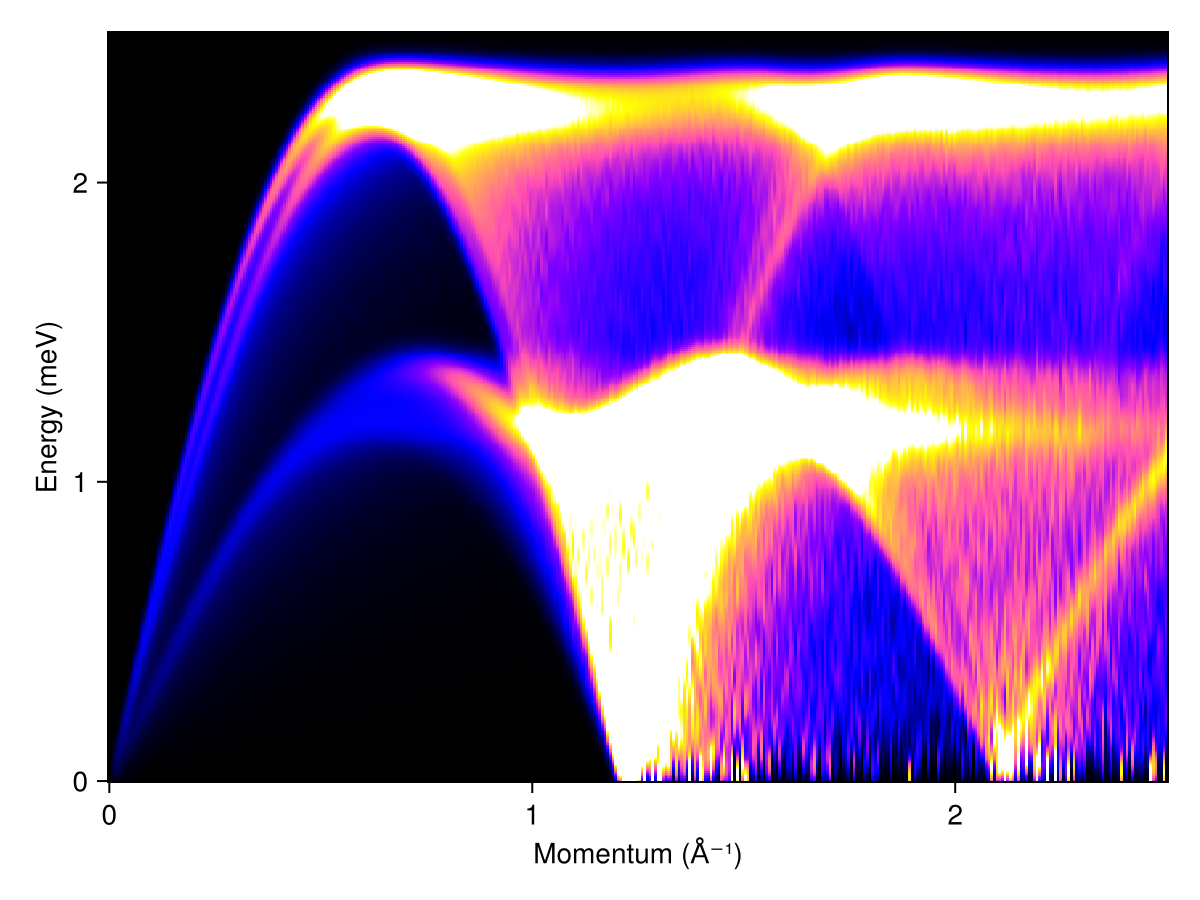

In [8]:
radii = range(0, 2.5, 400) # (1/Å)
energies = range(0, 2.5, 400)
kernel = gaussian(fwhm=0.1)
res = powder_average(Cr, radii, 1600) do q_points
    intensities(swt, q_points; energies, kernel)
end
plot_intensities(res; units, colorrange=(0,10))